In [2]:
#Script to attempt different clustering methods to see which works best with the grocery database

#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [3]:
basket_df = pd.read_csv("./csv_files/Trans_by_Basket_5000_Cust.csv") 

In [4]:
basket_df.head()

,basket_id,cust_id,time_id,store_id,std_quantity,nunique_products,n_products,sum_spend,cust_id.1,cust_price_sensitivity,cust_lifestage,basket_id.1,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_id.1,store_format,store_region,time_id.1,shop_week,date_from,date_to,shop_date,shop_hour
0,994111700818612,CUST0000999786,11463,STORE01125,0.0,1,1,1.66,CUST0000999786,MM,OT,994111700818612,S,MM,Small Shop,Fresh,STORE01125,MS,S02,11463,200819,20080630,20080706,20080705,8
1,994111300819473,CUST0000999786,11002,STORE01125,0.0,3,3,4.03,CUST0000999786,MM,OT,994111300819473,M,LA,Small Shop,Fresh,STORE01125,MS,S02,11002,200815,20080602,20080608,20080608,15
2,994111300819474,CUST0000999786,11040,STORE01125,0.0,2,2,1.89,CUST0000999786,MM,OT,994111300819474,S,MM,Small Shop,Mixed,STORE01125,MS,S02,11040,200815,20080602,20080608,20080607,18
3,994111200818180,CUST0000999786,10907,STORE02260,0.0,1,1,0.98,CUST0000999786,MM,OT,994111200818180,S,MM,Small Shop,Fresh,STORE02260,MS,S03,10907,200814,20080526,20080601,20080526,17
4,994110900818241,CUST0000999786,10611,STORE00962,0.0,1,1,0.67,CUST0000999786,MM,OT,994110900818241,S,MM,Small Shop,Nonfood,STORE00962,MS,S02,10611,200811,20080505,20080511,20080509,13


In [5]:
#See what the variables look like

basket_df.describe()

,basket_id,time_id,std_quantity,nunique_products,n_products,sum_spend,basket_id.1,time_id.1,shop_week,date_from,date_to,shop_date,shop_hour
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,9.941061e+14,5885.002200,0.516926,6.307600,9.067600,11.757822,9.941061e+14,5885.002200,200704.540600,2.006996e+07,2.007003e+07,2.007001e+07,14.522200
std,3.289585e+09,3224.676644,0.717255,6.543879,10.032386,13.680882,3.289585e+09,3224.676644,65.111992,7.049496e+03,7.092804e+03,7.084116e+03,3.504335
min,9.941001e+14,7.000000,0.000000,1.000000,1.000000,0.010000,9.941001e+14,7.000000,200607.000000,2.006041e+07,2.006042e+07,2.006041e+07,8.000000
25%,9.941033e+14,3186.250000,0.000000,2.000000,2.000000,2.327500,9.941033e+14,3186.250000,200639.000000,2.006112e+07,2.006113e+07,2.006112e+07,12.000000
50%,9.941060e+14,5862.500000,0.000000,4.000000,5.000000,7.020000,9.941060e+14,5862.500000,200714.000000,2.007053e+07,2.007060e+07,2.007060e+07,15.000000
75%,9.941089e+14,8639.000000,0.942809,9.000000,12.000000,16.160000,9.941089e+14,8639.000000,200743.000000,2.007122e+07,2.007122e+07,2.007122e+07,17.000000
max,9.941117e+14,11464.000000,10.842304,52.000000,80.000000,243.620000,9.941117e+14,11464.000000,200819.000000,2.008063e+07,2.008071e+07,2.008071e+07,21.000000


In [6]:
#Drop columns created by sql joins

basket_df = basket_df.drop(columns = ['basket_id.1','time_id.1','cust_id.1','store_id.1',])

In [7]:
basket_df.head()

,basket_id,cust_id,time_id,store_id,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity,cust_lifestage,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,shop_week,date_from,date_to,shop_date,shop_hour
0,994111700818612,CUST0000999786,11463,STORE01125,0.0,1,1,1.66,MM,OT,S,MM,Small Shop,Fresh,MS,S02,200819,20080630,20080706,20080705,8
1,994111300819473,CUST0000999786,11002,STORE01125,0.0,3,3,4.03,MM,OT,M,LA,Small Shop,Fresh,MS,S02,200815,20080602,20080608,20080608,15
2,994111300819474,CUST0000999786,11040,STORE01125,0.0,2,2,1.89,MM,OT,S,MM,Small Shop,Mixed,MS,S02,200815,20080602,20080608,20080607,18
3,994111200818180,CUST0000999786,10907,STORE02260,0.0,1,1,0.98,MM,OT,S,MM,Small Shop,Fresh,MS,S03,200814,20080526,20080601,20080526,17
4,994110900818241,CUST0000999786,10611,STORE00962,0.0,1,1,0.67,MM,OT,S,MM,Small Shop,Nonfood,MS,S02,200811,20080505,20080511,20080509,13


In [8]:
#Pick out the variables to be used in the model

X = basket_df[['store_id','std_quantity','nunique_products',
              'n_products','sum_spend','cust_price_sensitivity',
              'cust_lifestage','basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format','store_region']]

In [9]:
#Check for Na's

X.isna().sum()

store_id                      0
std_quantity                  0
nunique_products              0
n_products                    0
sum_spend                     0
cust_price_sensitivity        0
cust_lifestage              231
basket_size                   0
basket_price_sensitivity      0
basket_type                   0
basket_dominant_mission       0
store_format                  0
store_region                  0
dtype: int64

In [10]:
#Find Na's

X['cust_lifestage'].value_counts(dropna=False)

OT     2724
YF      730
YA      681
OA      434
NaN     231
OF      194
PE        6
Name: cust_lifestage, dtype: int64

In [11]:
#Fill Na's with Others

X['cust_lifestage'].fillna('OT')


0       OT
1       OT
2       OT
3       OT
4       OT
        ..
4995    OT
4996    OT
4997    OT
4998    OT
4999    OT
Name: cust_lifestage, Length: 5000, dtype: object

In [12]:
X['cust_lifestage'].value_counts(dropna=False)


OT     2724
YF      730
YA      681
OA      434
NaN     231
OF      194
PE        6
Name: cust_lifestage, dtype: int64

In [13]:
# Try some Heirarchal Clustering

from sklearn.preprocessing import StandardScaler

#Scale the data
scaler = StandardScaler()

# Seperate out the categorical variables first
X_cat = X[['cust_price_sensitivity',
              'cust_lifestage','basket_size', 'basket_price_sensitivity',
             'basket_type','basket_dominant_mission','store_format']]

#Seperate numerical variables
X_num = X[['std_quantity','nunique_products','n_products','sum_spend']]

#Dummy the categorical variables
X_dum = pd.get_dummies(X_cat)

#Scale the data
X_num_scale = pd.DataFrame(scaler.fit_transform(X_num),columns=['std_quantity','nunique_products','n_products','sum_spend'])

#Join the data toegther
X_all = pd.concat([X_num_scale,X_dum],axis=1,ignore_index=False)     
        

/home/dan/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


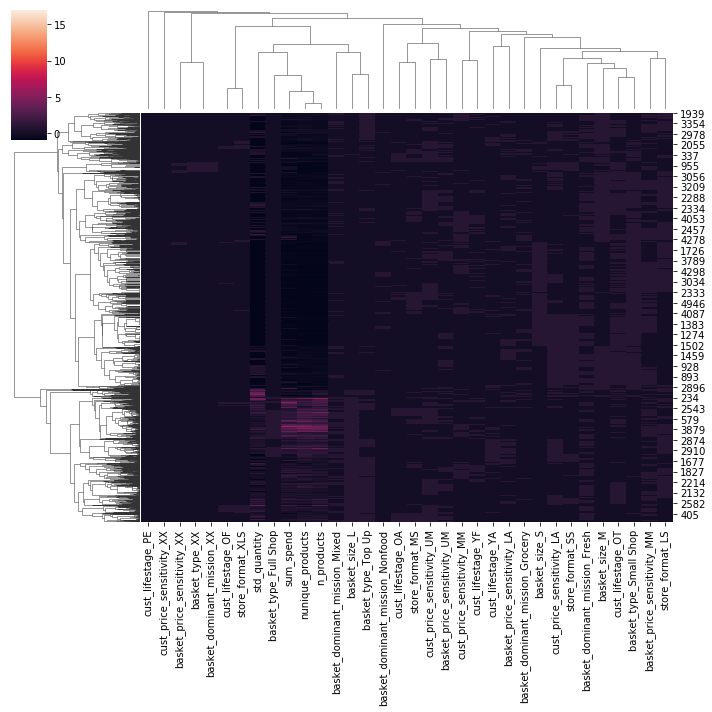

In [14]:
#Run the clustering using cosine metric

sns.clustermap(X_all, metric ='cosine', method ='average')

Text(0.5, 0, 'data indices')

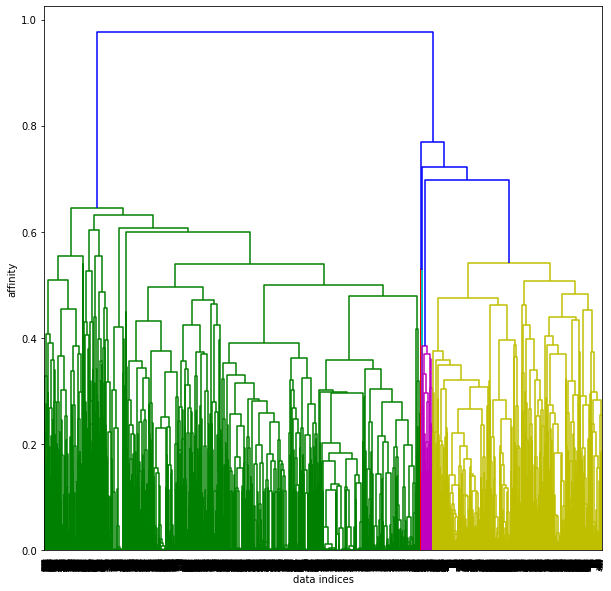

In [15]:
# Break apart some of the clusters and start looking at differences between groups....

from scipy.cluster.hierarchy import dendrogram, linkage

sausage_links = linkage(X_all, method='average', metric ='cosine')
plt.figure(figsize=(10,10))
sausage_plot = dendrogram(sausage_links)

plt.ylabel('affinity')
plt.xlabel('data indices')

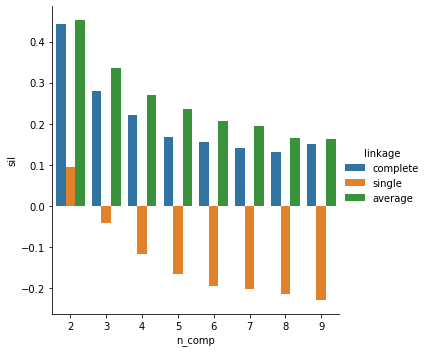

In [16]:
import itertools

#Search over number of components and linkages to see which performs best

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

#RUn the models
agg_model_list = [ AgglomerativeClustering(affinity = 'cosine', linkage = linkage, 
                  n_clusters = number).fit(X_all) for linkage,number in model_iterator]

#Compute the silhoutte score for each
agg_model_sil_list = [silhouette_score(X_all,model.labels_, metric = 'cosine') for model in agg_model_list]

model_iterator = itertools.product({'average', 'single', 'complete'}, range(2,10))

#THrow the results into a dataframe
agg_model_all_df = pd.DataFrame(model_iterator, columns =['linkage','n_comp'])

agg_model_all_df['sil'] = agg_model_sil_list 

#Plot the results
sns.catplot(x='n_comp',y='sil', hue= 'linkage',data=agg_model_all_df,kind='bar')


In [17]:
# Got max silihoutte score of 0.42 (average, Agglomerative Clustering, NClus = 2, Order by Time, N = 10000 )

# Got max silihoutte score of 0.44 (average, Agglomerative Clustering, NClus = 2, Order by Customer, N = 5000 )

X_all = pd.concat([X_num_scale,X_dum],axis=1,ignore_index=False) 

#Run the best model again 
best_agg_model = AgglomerativeClustering(affinity = 'cosine', linkage = 'average', 
                  n_clusters = 2).fit(X_all) 

#Create array for the two groups
X_zero = X_all.iloc[best_agg_model.labels_==0]

X_one = X_all.iloc[best_agg_model.labels_==1]

print(X_zero.describe().T)

print(X_one.describe().T)

#Look at the differences between the groups
print(X_zero.describe().T - X_one.describe().T)


                                  count      mean       std       min  \
std_quantity                     1627.0  0.825035  1.151436 -0.720772   
nunique_products                 1627.0  1.100575  1.051421 -0.811160   
n_products                       1627.0  1.131116  1.030605 -0.604862   
sum_spend                        1627.0  0.958972  1.180723 -0.825162   
cust_price_sensitivity_LA        1627.0  0.306699  0.461265  0.000000   
cust_price_sensitivity_MM        1627.0  0.223110  0.416460  0.000000   
cust_price_sensitivity_UM        1627.0  0.470191  0.499264  0.000000   
cust_price_sensitivity_XX        1627.0  0.000000  0.000000  0.000000   
cust_lifestage_OA                1627.0  0.130916  0.337412  0.000000   
cust_lifestage_OF                1627.0  0.090350  0.286771  0.000000   
cust_lifestage_OT                1627.0  0.330055  0.470377  0.000000   
cust_lifestage_PE                1627.0  0.000000  0.000000  0.000000   
cust_lifestage_YA                1627.0  0.253841  

0.8655605435278305 3226 1774
0.7555242746137284 3852 1148
0.6594820420345711 4077 923
0.4589319684965204 4251 749
0.3115514160338618 4387 613
0.8711565396738817 2889 2111
0.7537828559383853 3546 1454
0.656071886269608 3814 1186
0.4791141103750318 4059 941
0.2946480729810482 4224 776
0.8739333878294024 2575 2425
0.7630659336000277 3242 1758
0.6698668342720888 3559 1441
0.5085169875832801 3838 1162
0.2886928023769905 4021 979


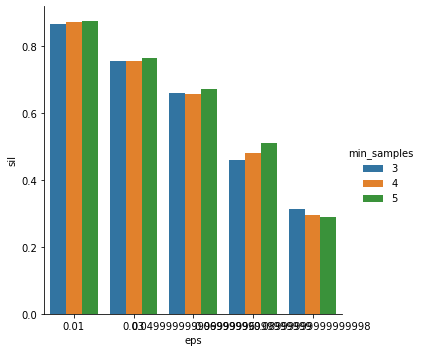

In [18]:
# Now try dbscan..... 

from sklearn.cluster import DBSCAN

#Try some different parameters
model_iterator = itertools.product({3,4,5}, np.arange(0.01,0.1,0.02))

db_model_list = [ DBSCAN(metric = 'cosine',eps=eps,
                        min_samples = min_samples).fit(X_all) for min_samples,eps in model_iterator]

db_model_sil_list = []

#Calculate silhoutte score for each model
for model in db_model_list:

    #Find data points labelled as noise
    not_noise_index = np.where(model.labels_!=-1)[0]
    noise_index = np.where(model.labels_==-1)[0]

    #Calculate score on non noise labels
    try:
        sil_score = silhouette_score(X_all.iloc[not_noise_index], model.labels_[not_noise_index], metric='cosine')
        print(sil_score,len(not_noise_index),len(noise_index))
        
        db_model_sil_list.append(sil_score)

    except:
        db_model_sil_list.append(np.nan)


model_iterator = itertools.product({3,4,5}, np.arange(0.01,0.1,0.02))

#Throw results into a dataframe
db_model_all_df = pd.DataFrame(model_iterator, columns =['min_samples','eps'])

db_model_all_df['sil'] = db_model_sil_list 

#Plot the results
sns.catplot(x='eps',y='sil', hue='min_samples', data=db_model_all_df,kind='bar')

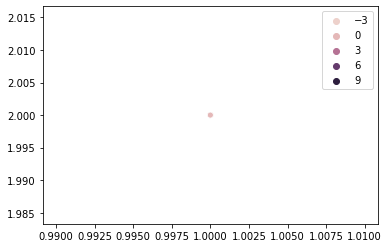

In [19]:
#Take a look at the best model

db_best_model = DBSCAN(metric = 'cosine',eps=0.13, min_samples = 5).fit(X_all)


#X_all.columns = ['std_quantity','nunique_products','n_products','sum_spend','cust_price_sensitivity',
             # 'cust_lifestage','basket_size', 'basket_price_sensitivity',
             #'basket_type','basket_dominant_mission','store_format']

sns.scatterplot(1, 
                2, 
                data=X_all, 
                hue=db_best_model.labels_)

#Not great almost all points in one group... decide to use agglomerative clustering

In [20]:
x = db_best_model.labels_

unique, counts = np.unique(x, return_counts=True)

print( np.asarray((unique, counts)).T)

[[  -1  205]
 [   0 4656]
 [   1    6]
 [   2    7]
 [   3    9]
 [   4   94]
 [   5    6]
 [   6    7]
 [   7    5]
 [   8    5]]


In [21]:
X_all.head()

,std_quantity,nunique_products,n_products,sum_spend,cust_price_sensitivity_LA,cust_price_sensitivity_MM,cust_price_sensitivity_UM,cust_price_sensitivity_XX,cust_lifestage_OA,cust_lifestage_OF,cust_lifestage_OT,cust_lifestage_PE,cust_lifestage_YA,cust_lifestage_YF,basket_size_L,basket_size_M,basket_size_S,basket_price_sensitivity_LA,basket_price_sensitivity_MM,basket_price_sensitivity_UM,basket_price_sensitivity_XX,basket_type_Full Shop,basket_type_Small Shop,basket_type_Top Up,basket_type_XX,basket_dominant_mission_Fresh,basket_dominant_mission_Grocery,basket_dominant_mission_Mixed,basket_dominant_mission_Nonfood,basket_dominant_mission_XX,store_format_LS,store_format_MS,store_format_SS,store_format_XLS
0,-0.720772,-0.81116,-0.804236,-0.738171,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-0.720772,-0.50550,-0.604862,-0.564919,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
2,-0.720772,-0.65833,-0.704549,-0.721358,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
3,-0.720772,-0.81116,-0.804236,-0.787880,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,-0.720772,-0.81116,-0.804236,-0.810542,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [22]:
best_agg_model.labels_

array([1, 1, 1, ..., 0, 1, 0])